In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import requests
from sklearn.metrics import mean_squared_error  # This import should work

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings

In [19]:
id = 6

In [20]:
url = f'https://gc22e38dbd8c2e8-polishcow.adb.eu-madrid-1.oraclecloudapps.com/ords/polish_user/embalse_agua_model/?q={{"ID":{{"$eq":{id}}}}}&limit=10000'
response = requests.get(url)
print(response)
warnings.filterwarnings("ignore")

<Response [200]>


0  fechas no válidas
            anio  mes     fecha  agua_actual
date                                        
1994-02-01  1994    2  94-02-01         17.0
1994-03-01  1994    3  94-03-01         16.6
1994-04-01  1994    4  94-04-01         16.0
1994-05-01  1994    5  94-05-01         16.2
1994-06-01  1994    6  94-06-01         16.5
date
1994-02-01    17.0
1994-03-01    16.6
1994-04-01    16.0
1994-05-01    16.2
1994-06-01    16.5
Freq: MS, Name: agua_actual, dtype: float64


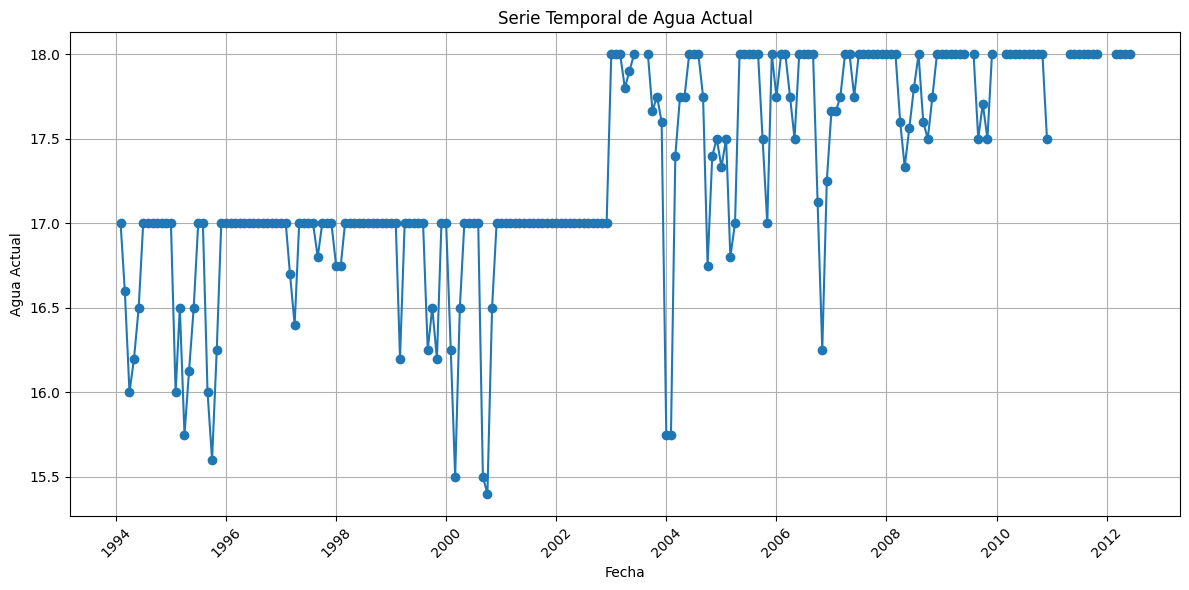

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que 'response' ya contiene los datos JSON
df = pd.DataFrame(response.json()['items'], columns=['anio', 'mes', 'fecha', 'agua_actual'])

# Convertir columnas a enteros si es necesario
df['anio'] = df['anio'].astype(int)
df['mes'] = df['mes'].astype(int)
df['agua_actual'] = pd.to_numeric(df['agua_actual'], errors='coerce')

# Crear la columna 'date' asegurándose del formato
df['date'] = pd.to_datetime(df['fecha'], format='%y-%m-%d', errors='coerce')

# Verificar si hay valores NaT en 'date'
print(df['date'].isnull().sum(), " fechas no válidas")

# Establecer la nueva columna 'date' como índice
df.set_index('date', inplace=True)

# Verificar los primeros registros del DataFrame
print(df.head())

# Crear la serie temporal a partir de 'agua_actual'
st = df['agua_actual'].asfreq('MS')  # MS establece frecuencia de inicio de mes

# Verificar si 'st' tiene datos
print(st.head())

# Graficar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(st, marker='o', linestyle='-')
plt.title('Serie Temporal de Agua Actual')
plt.xlabel('Fecha')
plt.ylabel('Agua Actual')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
rmse = mean_squared_error(test, predictions_auto, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.2257153531218482


date
1994-02-01    17.0
1994-03-01    16.6
1994-04-01    16.0
1994-05-01    16.2
1994-06-01    16.5
              ... 
2012-02-01     NaN
2012-03-01    18.0
2012-04-01    18.0
2012-05-01    18.0
2012-06-01    18.0
Freq: MS, Name: agua_actual, Length: 221, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=154.058, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=205.794, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=203.319, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=203.288, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=203.826, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=152.814, Time=1.46 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=154.809, Time=0.31 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=153.097, Time=2.72 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=152.276, Time=0.94 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=153.805, Time=2.74 sec
 ARIMA(2,1,2)(2,0,1)[12] i

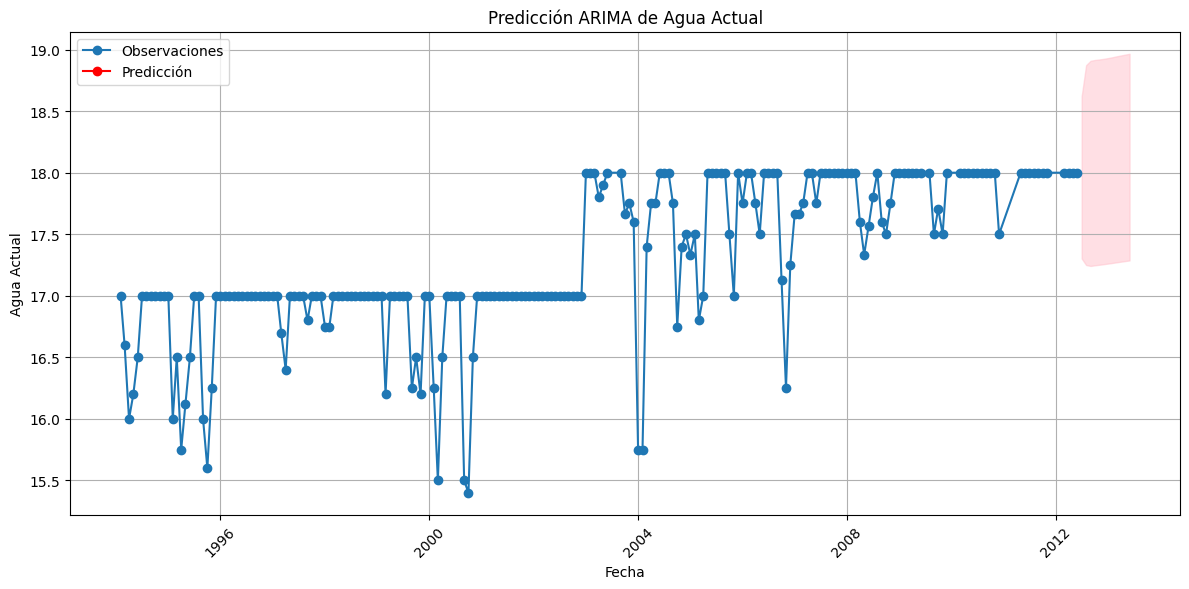

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np

print(st)
st = st.dropna()

# Supongamos que 'st' es tu serie temporal de agua actual
# Ajustar el modelo AutoARIMA
model = auto_arima(st, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Resumen del modelo
print(model.summary())

# Predecir los próximos 12 meses
n_periods = 12
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Crear un índice para las predicciones futuras
forecast_index = pd.date_range(start=st.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')

# Crear un DataFrame para las predicciones
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Predicción'])
conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['Lower CI', 'Upper CI'])

# Graficar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(st, marker='o', linestyle='-', label='Observaciones')
plt.plot(forecast_df, marker='o', linestyle='-', color='red', label='Predicción')
plt.fill_between(conf_int_df.index, conf_int_df['Lower CI'], conf_int_df['Upper CI'], color='pink', alpha=0.5)
plt.title('Predicción ARIMA de Agua Actual')
plt.xlabel('Fecha')
plt.ylabel('Agua Actual')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
print("Predicciones:", forecast)
print("Longitud de las predicciones:", len(forecast))


Predicciones: 2012-07-01    17.756796
2012-08-01    17.684680
2012-09-01    17.663296
2012-10-01    17.656954
2012-11-01    17.655074
2012-12-01    17.654517
2013-01-01    17.654351
2013-02-01    17.654302
2013-03-01    17.654288
2013-04-01    17.654283
2013-05-01    17.654282
2013-06-01    17.654282
Freq: MS, Name: predicted_mean, dtype: float64
Longitud de las predicciones: 12


In [ ]:
# Crear gráfico estacional
plt.figure(figsize=(10, 6))
for year in range(st2.index.year.min(), st2.index.year.max() + 1):
    yearly_data = st2[st2.index.year == year]
    plt.plot(yearly_data.index.month, yearly_data.values, label=year)

plt.title('Gráfico estacional de dispositivos infectados')
plt.xlabel('Mes')
plt.ylabel('Dispositivos infectados')
plt.legend(loc="upper right", ncol=2, fontsize="small")
plt.xticks(range(1, 13))
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm  # para auto.arima en Python
from statsmodels.tsa.arima.model import ARIMA

# Suponiendo que `st2` ya es la serie temporal creada previamente
# Test de Dickey-Fuller aumentado (ADF)
adf_result = adfuller(st2)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Interpretación del test ADF
if adf_result[1] < 0.05:
    print("La serie es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La serie no es estacionaria (no podemos rechazar la hipótesis nula).")

# Ajuste del modelo ARIMA automáticamente (similar a auto.arima en R)
model = pm.auto_arima(st2, seasonal=False, stepwise=True, trace=True)

# Forecast (predicción) para los próximos 10 periodos
forecast, conf_int = model.predict(n_periods=10, return_conf_int=True)

# Gráfico de la predicción
plt.figure(figsize=(10, 5))
plt.plot(st2, label='Observado')
plt.plot(pd.date_range(st2.index[-1], periods=10, freq="M"), forecast, label='Pronóstico', color='red')
plt.fill_between(pd.date_range(st2.index[-1], periods=10, freq="M"), 
                 conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Predicción de ARIMA para los próximos 10 periodos')
plt.xlabel('Fecha')
plt.ylabel('Dispositivos infectados')
plt.legend()
plt.show()

NameError: name 'st2' is not defined

In [8]:
print(df.head())

                      fecha  agua_actual
0 1988-01-05 00:00:00+00:00            0
1 1988-01-12 00:00:00+00:00            0
2 1988-01-19 00:00:00+00:00            0
3 1988-01-26 00:00:00+00:00            0
4 1988-02-02 00:00:00+00:00            0


In [19]:
result = adfuller(df["agua_actual"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.7355879253281492
p-value: 0.41287602621039166


In [15]:
if result[1] > 0.05:  
    df["agua_actual_diff"] = df["agua_actual"].diff().dropna()
    
    result = adfuller(df["agua_actual_diff"].dropna())
    stationarity_interpretation = "Stationary" if result[1] < 0.05 else "Non-Stationary"
    
    print(f"ADF Statistic after differencing: {result[0]}")
    print(f"p-value after differencing: {result[1]}")
    print(f"Interpretation: The series is {stationarity_interpretation}.")

ADF Statistic after differencing: -13.621073081341828
p-value after differencing: 1.7962174669909232e-25
Interpretation: The series is Stationary.


In [12]:
df.fillna(method='ffill', inplace=True)

In [20]:
print(df)

                         fecha  agua_actual
0    1988-01-05 00:00:00+00:00            0
1    1988-01-12 00:00:00+00:00            0
2    1988-01-19 00:00:00+00:00            0
3    1988-01-26 00:00:00+00:00            0
4    1988-02-02 00:00:00+00:00            0
...                        ...          ...
1273 2012-05-29 00:00:00+00:00           18
1274 2012-06-05 00:00:00+00:00           18
1275 2012-06-12 00:00:00+00:00           18
1276 2012-06-19 00:00:00+00:00           18
1277 2012-06-26 00:00:00+00:00           18

[1278 rows x 2 columns]


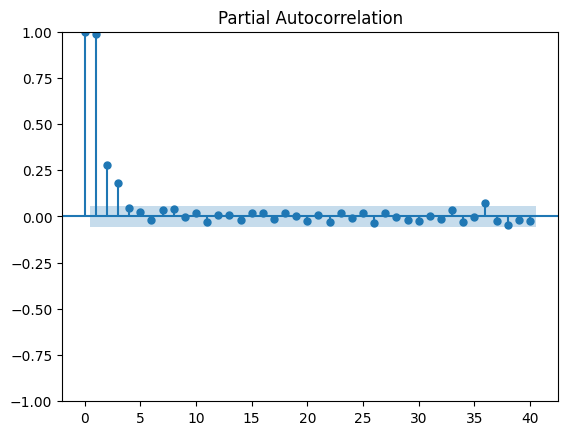

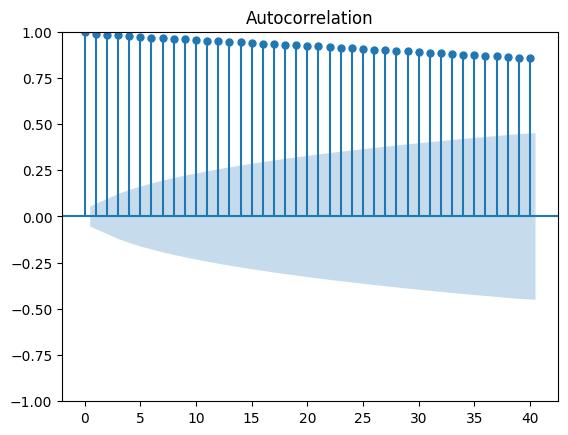

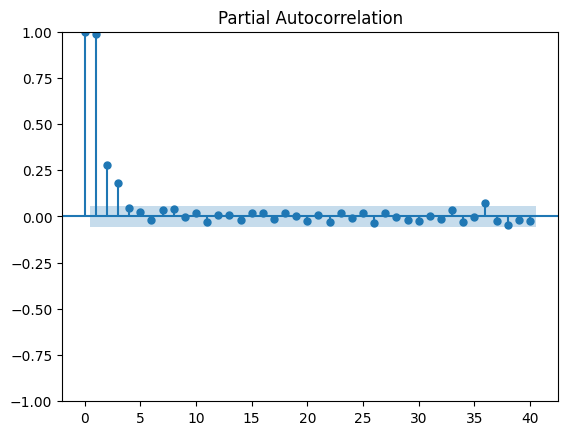

In [21]:
plot_acf(df["agua_actual"], lags=40)
plot_pacf(df["agua_actual"], lags=40)

In [22]:
p, d, q = 3, 1, 2

In [25]:
data = df["agua_actual"]
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [33]:
model = ARIMA(train, order=(p, d, q))  # Reemplaza p, d, q con tus parámetros
model_fit = model.fit()  # Ajustar el modelo

# Pronóstico
forecast = model_fit.forecast(steps=len(test)*2)

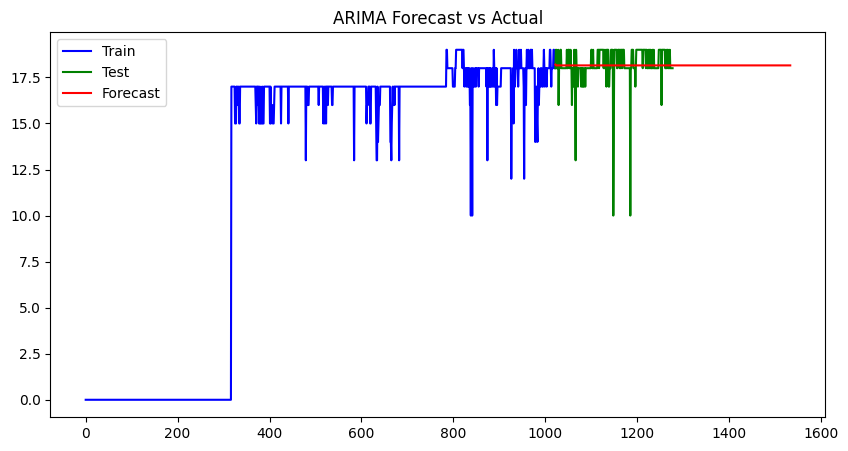

In [36]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data.index[:train_size], train, label='Train', color='blue')
plt.plot(data.index[train_size:], test, label='Test', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

In [30]:
rmse = mean_squared_error(test, forecast, squared=False)
print(f"RMSE: {rmse}")

RMSE: 1.0538090447696702


In [34]:
print(forecast)
print(test)
print(train)

1022    18.194330
1023    18.157370
1024    18.147322
1025    18.152720
1026    18.152400
          ...    
1529    18.152144
1530    18.152144
1531    18.152144
1532    18.152144
1533    18.152144
Name: predicted_mean, Length: 512, dtype: float64
1022    18
1023    19
1024    19
1025    18
1026    18
        ..
1273    18
1274    18
1275    18
1276    18
1277    18
Name: agua_actual, Length: 256, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
1017    18
1018    19
1019    19
1020    18
1021    18
Name: agua_actual, Length: 1022, dtype: int64
